In [1]:
import os, numpy as np, matplotlib.pyplot as plt, seaborn as sns, pandas as pd

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-insurance-dataset/Health_insurance.csv


In [2]:
data = pd.read_csv('/kaggle/input/health-insurance-dataset/Health_insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print('Basic information about the dataset\n\n')
data.info(), data.describe()

Basic information about the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(None,
                age          bmi     children       charges
 count  1338.000000  1338.000000  1338.000000   1338.000000
 mean     39.207025    30.663397     1.094918  13270.422265
 std      14.049960     6.098187     1.205493  12110.011237
 min      18.000000    15.960000     0.000000   1121.873900
 25%      27.000000    26.296250     0.000000   4740.287150
 50%      39.000000    30.400000     1.000000   9382.033000
 75%      51.000000    34.693750     2.000000  16639.912515
 max      64.000000    53.130000     5.000000  63770.428010)

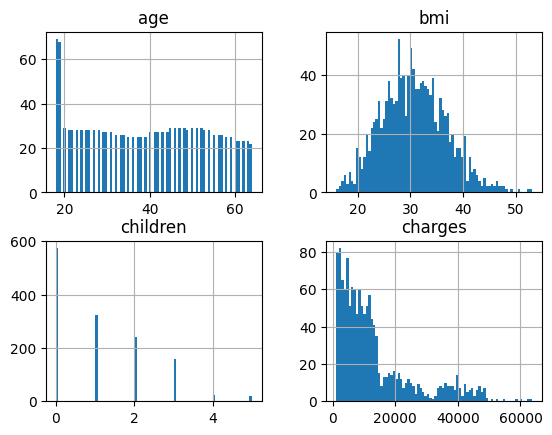

In [4]:
# Creating plots for all the float/int data types
data.hist(bins = 80)
plt.show()

**Plots used to visualize numerical data** 
* Histogram
* Box Plot 
* Scatter Plot 
* LIne chart
* Heatmap 

**Plots used to visualize categorical data** 
* Bar plot
* Pie chart
* count plot
* Box plot

We can construct correlation matrix and then construct the heatmap to see various types of relationships among the columns(numerical columns only), Working a lot on categorical columns doesn't help much as we can't quantify them, just label or one-hot code them and that doesn't help much. 


In [5]:
cols = data.columns 
cat_cols = [x for x in cols if data[x].dtype == object]
num_cols = list(set(cols) - set(cat_cols))
cat_cols

['sex', 'smoker', 'region']

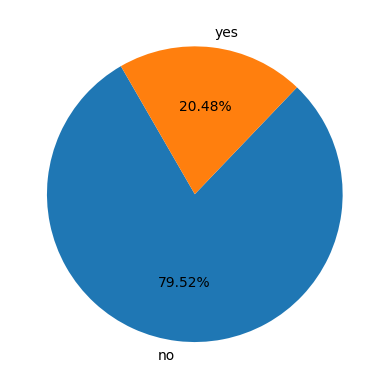

In [6]:
# Pie chart for a feature(categorical), just for fun

count = data['smoker'].value_counts() 
plt.pie(
    count, # total count which we got from the value_counts() function 
    labels = count.index, # unique values, for which we have counts, here male and female
    autopct = '%1.2f%%', # for formatting and number of decimal points
    startangle = 120 # this is to rotate the whole pie chart, 
)
plt.show()

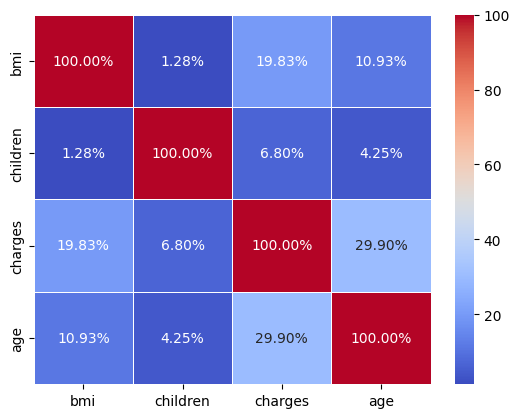

In [7]:
corr_mat = data[num_cols].corr() # get the correlation matrix for numerical columns

# draw the heatmap to see the correlations, how much they are correlated in percentage
sns.heatmap(corr_mat * 100, annot = True, fmt = '.2f', cmap = 'coolwarm', linewidth = 0.5)
# add the percentage sign
for text in plt.gca().texts:
    text.set_text(f"{text.get_text()}%")

plt.show()

In [8]:
import plotly.express as px

# scatter-plot with Plotly Express
fig = px.scatter(
    data,
    x='charges',
    y='bmi',
    color='sex',
    labels={'charges': 'Charges', 'bmi': 'BMI'},
    title='Scatter Plot with Hover Information',
    hover_name=data.index,  # Show the index as hover information
    size_max=10,  # Set maximum marker size
)

# Show the plot
fig.show()


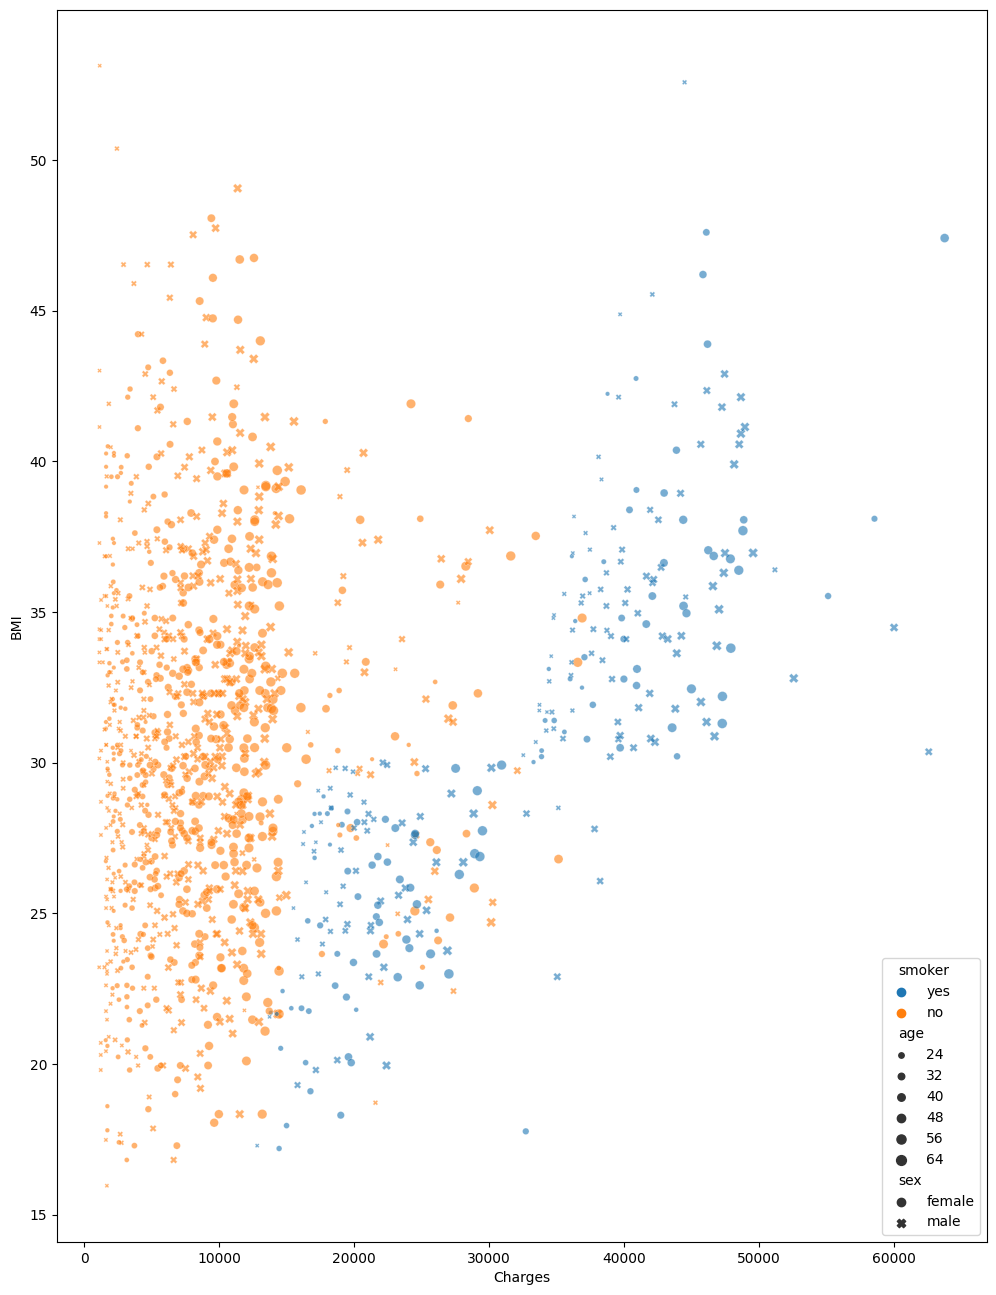

In [9]:
# scatter-plot using sns for various pairs of numerical columns
figure = plt.figure(figsize = (12, 16))

sns.scatterplot(
    x = 'charges', 
    y = 'bmi', 
    hue = 'smoker', # classifies on the basis of smoking habit, here different colors 
    style = 'sex', # classifies on the basis of sex, different styles of points, here stars and points
    size = 'age', # classifies on the basis of age, different sizes
    data = data, 
    s = 20, 
    sizes = (10, 50), # this is for adjustment of size
    alpha = 0.6
)

plt.xlabel('Charges')
plt.ylabel('BMI')

plt.show()

To see how good results we get, we can try building the model using features which are more correlated with target and then based on the results go on including rest of the features(This is my idea). 